In [18]:
from standardInclude import *

In [19]:
#f = r.TFile("./data/trackeryVsCaloYVsTime.root")
#f = r.TFile("./data/trackeryVsCaloYVsTime_random_highenergy.root")
#f = r.TFile("./data/trackeryVsCaloYVsTime_random_energy_1100_3200_station12.root")
#f = r.TFile("./data/trackeryVsCaloYVsTime_random_energy_1100_3200_station12_extrapolatedCaloHitPositions.root")
f = r.TFile("./data/trackeryVsCaloYVsTime_random_energy_1100_2400_station18_extrapolatedCaloHitPositions.root")
f.ls()

TFile**		./data/trackeryVsCaloYVsTime_random_energy_1100_2400_station18_extrapolatedCaloHitPositions.root	
 TFile*		./data/trackeryVsCaloYVsTime_random_energy_1100_2400_station18_extrapolatedCaloHitPositions.root	
  KEY: TH3I	trackerVsCaloY_noRandomization;1	Y-Distribution in Calo vs. Tracker vs. Time
  KEY: TH3I	trackerDecayVsCaloY;1	Y-Distribution in Calo vs. Tracker vs. Time
  KEY: TH3I	trackerVsCaloY;1	Y-Distribution in Calo vs. Tracker vs. Time
  KEY: TH2I	verticalMomentumVsTime;1	Vertical Track Momentum vs. Time
  KEY: TProfile	h3;1	Y-Distribution in Calo vs. Tracker vs. Time yx projection


In [20]:
h3 = f.Get("trackerVsCaloY").Clone()
h2 = f.Get("trackerVsCaloY_noRandomization").Clone()
h = f.Get("trackerDecayVsCaloY").Clone()

h2.SetLineColor(2)
h3.SetLineColor(3)
h.SetDirectory(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


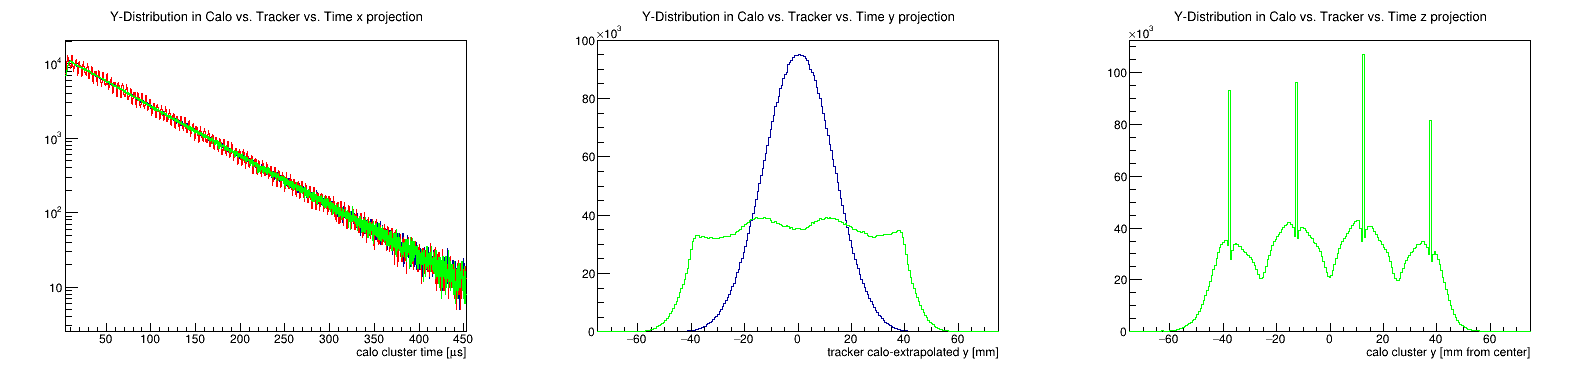

In [21]:
c = r.TCanvas("c","c",1600,400)
h.GetXaxis().UnZoom()
c.Divide(3)

c.cd(1)
h.Project3D("x").Draw()
h2.Project3D("x").Draw("SAME")
h3.Project3D("x").Draw("SAME")
r.gPad.SetLogy()

c.cd(2)
h.Project3D("y").Draw()
h2.Project3D("y").Draw("SAME")
h3.Project3D("y").Draw("SAME")

c.cd(3)
h.Project3D("z").Draw()
h2.Project3D("z").Draw("SAME")
h3.Project3D("z").Draw("SAME")

c.Draw()

In [22]:
column_names = ['time','calo_y', 'calo_y_std', 
                'tracker_y', 'tracker_y_std',
               'tracker_gaussian_mean', 'tracker_gaussian_sigma',
               'calo_y_err', 'calo_y_std_err', 
                'tracker_y_err', 'tracker_y_std_err',
               'tracker_gaussian_mean_err', 'tracker_gaussian_sigma_err', 'tracker_gaussian_chisquare']

df = pandas.DataFrame(columns = column_names)

func = r.TF1("func","gaus",-40,40)
func.SetParameters(10000,0,20)

for binx in range(1,h.GetNbinsX()+1):
    if(binx > 3 and False):
        break
        
    h.GetXaxis().SetRange(binx,binx)
    h_calo = h.Project3D("z").Clone()
    h_tracker = h.Project3D("y").Clone()
    
    time = h.GetXaxis().GetBinCenter(binx)
    
    calo_y = h_calo.GetMean(1)
    calo_y_err = h_calo.GetMean(11)
    stdi = (uncertainties.ufloat((h_calo.GetStdDev(1)),(h_calo.GetStdDev(11))))**2
    calo_y_std = stdi.n
    calo_y_std_err = stdi.s
    
    tracker_y = h_tracker.GetMean(1)
    tracker_y_err = h_tracker.GetMean(11)
    stdi2 = (uncertainties.ufloat((h_tracker.GetStdDev(1)),(h_tracker.GetStdDev(11))))**2
    tracker_y_std = stdi2.n
    tracker_y_std_err = stdi2.s
    
    if(binx < 2):
        h_tracker.Fit(func,"REMBQ")
    tracker_mean = func.GetParameter(1)
    tracker_mean_err = func.GetParError(1)
    tracker_sigma = func.GetParameter(2)
    tracker_sigma_err = func.GetParError(2)
    
    if(func.GetNDF() > 0):
        tracker_gaussian_chisquare = func.GetChisquare()/func.GetNDF()
    else:
        tracker_gaussian_chisquare = func.GetChisquare()
    
    veci = [time, 
            calo_y, calo_y_std, tracker_y, tracker_y_std, tracker_mean, tracker_sigma,
           calo_y_err, calo_y_std_err, tracker_y_err, tracker_y_std_err, tracker_mean_err, tracker_sigma_err,
           tracker_gaussian_chisquare]
    
    df.loc[len(df)] = veci
    

In [23]:
df.describe()

,time,calo_y,calo_y_std,tracker_y,tracker_y_std,tracker_gaussian_mean,tracker_gaussian_sigma,calo_y_err,calo_y_std_err,tracker_y_err,tracker_y_std_err,tracker_gaussian_mean_err,tracker_gaussian_sigma_err,tracker_gaussian_chisquare
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03
mean,228.785000,-1.317123,682.370646,0.378889,157.070428,-1.505963e+00,1.283873e+01,2.129126,78.299793,1.016614,17.933053,1.582478e-01,1.064812e-01,1.181037e+00
std,129.223862,2.965807,77.381992,1.408714,22.901022,1.230332e-13,3.197975e-13,1.989483,75.350158,0.950716,17.536603,3.608826e-16,1.027127e-15,1.510155e-14
min,5.074595,-23.776323,227.982096,-9.225598,34.432747,-1.505963e+00,1.283873e+01,0.247150,9.031979,0.124203,2.280166,1.582478e-01,1.064812e-01,1.181037e+00
25%,116.929798,-2.126771,666.155302,-0.056070,150.384776,-1.505963e+00,1.283873e+01,0.576696,21.452374,0.275295,4.889509,1.582478e-01,1.064812e-01,1.181037e+00
50%,228.785000,-1.342853,686.319426,0.442387,158.500472,-1.505963e+00,1.283873e+01,1.356010,50.447499,0.649211,11.513905,1.582478e-01,1.064812e-01,1.181037e+00
75%,340.640202,-0.464589,707.664958,0.795491,164.840179,-1.505963e+00,1.283873e+01,3.187856,114.239301,1.513564,25.273933,1.582478e-01,1.064812e-01,1.181037e+00
max,452.495405,18.455589,1191.613739,9.910359,356.828551,-1.505963e+00,1.283873e+01,14.112294,636.944335,5.422134,129.028435,1.582478e-01,1.064812e-01,1.181037e+00


In [24]:
timeStart = 30
timeEnd = 200

dfi = df.loc[df['time'] >= timeStart].loc[df['time'] <= timeEnd]

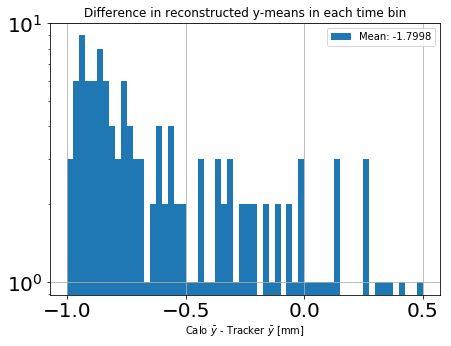

In [25]:
fig,ax = plt.subplots(figsize=(7,5))
plt.hist(dfi['calo_y']- dfi['tracker_y'], bins=60,label="Mean: "+str(round(np.mean(dfi['calo_y']- dfi['tracker_y']),4)),
        range=(-1.0,0.5))
plt.title("Difference in reconstructed y-means in each time bin")
plt.xlabel(r"Calo $\bar{y}$ - Tracker $\bar{y}$ [mm]")
plt.grid()
plt.legend()
plt.yscale("log")
plt.show()

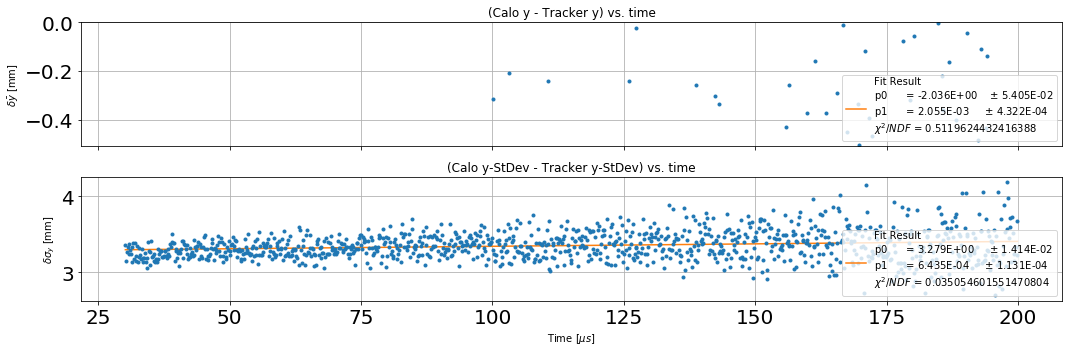

In [26]:
fig,ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

axi = ax[0]
toplot = (dfi['calo_y']- dfi['tracker_y'])
ax[0].errorbar(dfi['time'], toplot, 
             fmt=".")
ax[0].set_title("(Calo y - Tracker y) vs. time")

axi.set_ylim(-0.51,0)
func = r.TF1("func","pol1",10,1000,2)
func.SetParameters(1,0)

fitresult = fitVector( list(dfi['time']), toplot, func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi['calo_y']))], 
                        #yerr=[0 for i in range(len(dfi['calo_y']))],
                        #yerr=dfi['tracker_y_err'] 
                     )
ax[0].plot(dfi['time'], fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
axi.set_ylabel(r"$\delta \bar{y}$ [mm]")


axi = ax[1]

toplot = list((dfi['calo_y_std']- dfi['tracker_y_std'])/dfi['tracker_y_std'])
axi.errorbar(dfi['time'], toplot, 
             fmt=".")
axi.set_title("(Calo y-StDev - Tracker y-StDev) vs. time")

func = r.TF1("func","pol1",10,1000,2)
func.SetParameters(1,1)
fitresult = fitVector( list(dfi['time']), toplot, func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi['calo_y']))], 
                        #yerr=[0 for i in range(len(dfi['calo_y']))],
                        #yerr=dfi['tracker_y_err'] 
                     )
axi.plot(dfi['time'], fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )

axi.set_xlabel(r"Time [$\mu s$]")
axi.set_ylabel(r"$\delta \sigma_{y}$ [mm]")

for axi in ax:
    axi.legend(loc=4)
    axi.grid()
#plt.xlim(30,70)
plt.tight_layout()
plt.show()

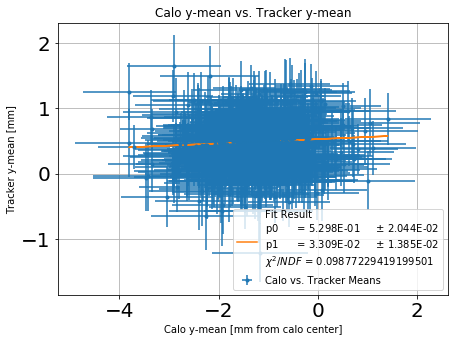

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
plt.errorbar(dfi['calo_y'], dfi['tracker_y'],
             xerr=dfi['calo_y_err'], 
             yerr=dfi['tracker_y_err'],
             fmt=".", label="Calo vs. Tracker Means")
plt.grid()
plt.title("Calo y-mean vs. Tracker y-mean")
plt.xlabel("Calo y-mean [mm from calo center]")
plt.ylabel("Tracker y-mean [mm]")

func = r.TF1("func","pol1",-10,10,2)
func.SetParameters(1,1)
fitresult = fitVector( dfi['calo_y'], dfi['tracker_y'], func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi['calo_y']))], 
                        #yerr=[0 for i in range(len(dfi['calo_y']))],
                        #yerr=dfi['tracker_y_err'] 
                     )
plt.plot(dfi['calo_y'], fitresult[0], "-",
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
plt.legend()
#plt.ylim(-0.51,1.2)

plt.show()

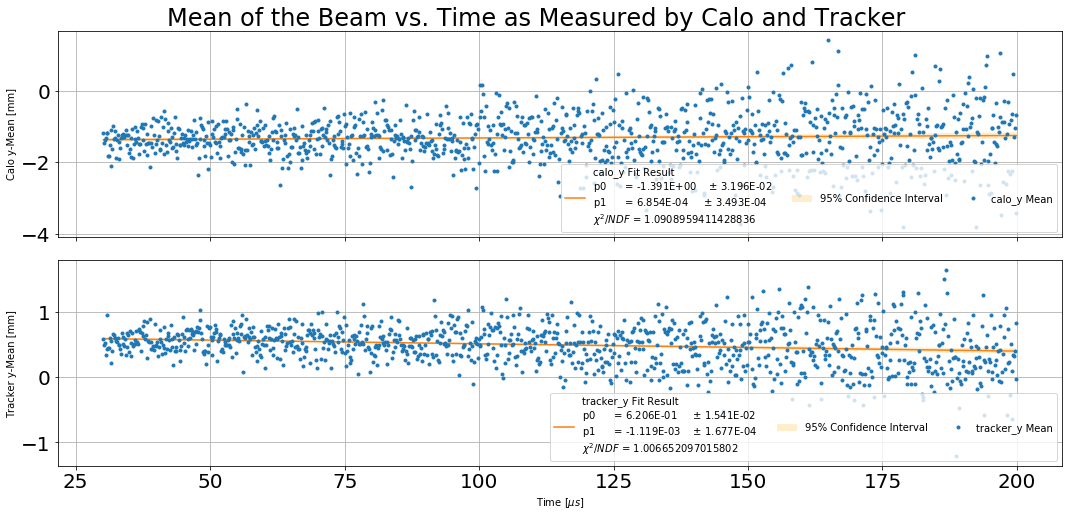

In [28]:
fig,ax = plt.subplots(2,1,figsize=(15,7), sharex=True)

toplot = ['calo_y', 'tracker_y']#, 'tracker_gaussian_mean']
titles = ["Calo y-Mean [mm]", 'Tracker y-Mean [mm]', 'Tracker y-Mean From Gaussian Fit']
fitresults_mean = []

for i, quantity in enumerate(toplot):

    axi = ax[i]
    axi.set_ylabel(titles[i])
    
    axi.errorbar(dfi['time'], dfi[quantity], 
                 #yerr=dfi[quantity+"_err"], 
                 fmt=".",label=quantity+" Mean")

    func = r.TF1("func","pol1",30,200,2)
    func.SetParameters(-1,-1)
    fitresult = fitVector( dfi['time'], dfi[quantity], func,
                            #xerr=dfi['calo_y_err'], 
                            xerr=[0 for i in range(len(dfi[quantity]))], 
                            #yerr=[0 for i in range(len(dfi['calo_y']))],
                            yerr=dfi[quantity+'_err'] 
                         )
    fitresults_mean.append(fitresult)

    axi.plot(dfi['time'], fitresult[0],
            label=quantity+" "+labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
    
    drawConfidenceIntervals(axi, dfi['time'], fitresult, 'orange', '95% Confidence Interval')


#axi.set_xlim(5,170)
axi.set_xlabel(r"Time [$\mu s$]")

for axi in ax:
    axi.grid()
    axi.legend(loc=4, ncol=4)
    #axi.set_ylim(20,40)
plt.tight_layout()
plt.suptitle("Mean of the Beam vs. Time as Measured by Calo and Tracker", y=1.02, fontsize=24)
plt.show()

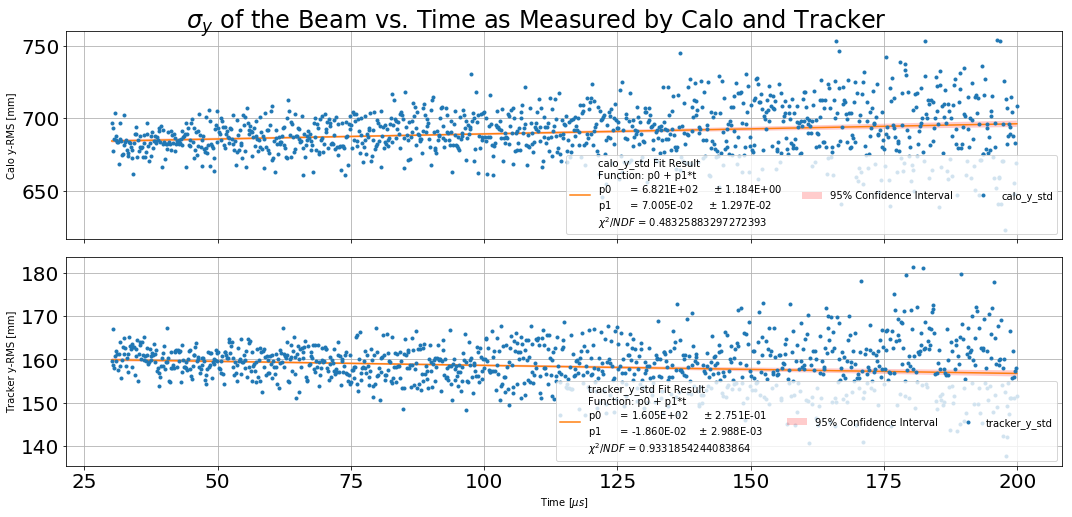

In [29]:
fig,ax = plt.subplots(2,1,figsize=(15,7), sharex=True)

toplot = ['calo_y_std', 'tracker_y_std']#, 'tracker_gaussian_sigma']
titles = ["Calo y-RMS [mm]", 'Tracker y-RMS [mm]', 'Tracker y-Sigma From Gaussian Fit [mm]']
fitresults_sigma = []

for i, quantity in enumerate(toplot):

    axi = ax[i]
    axi.set_ylabel(titles[i])
    
    axi.errorbar(dfi['time'], dfi[quantity], 
                 #yerr=dfi[quantity+"_err"], 
                 fmt=".",label=quantity)

    func = r.TF1("func","pol1",30,200,2)
    func.SetParameters(-1,0)
    fitresult = fitVector( dfi['time'], dfi[quantity], func,
                            #xerr=dfi['calo_y_err'], 
                            xerr=[0 for i in range(len(dfi[quantity]))], 
                            #yerr=[0 for i in range(len(dfi['calo_y']))],
                            yerr=dfi[quantity+'_err'] 
                         )
    fitresults_sigma.append(fitresult)

    axi.plot(dfi['time'], fitresult[0],
            label=quantity+" "+labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2], "p0 + p1*t") )
    drawConfidenceIntervals(axi, dfi['time'], fitresult, 'red', '95% Confidence Interval')


#axi.set_xlim(20,210)
axi.set_xlabel(r"Time [$\mu s$]")
for axi in ax:
    axi.grid()
    axi.legend(loc=4, ncol=4)
plt.tight_layout()
plt.suptitle(r"$\sigma_{y}$ of the Beam vs. Time as Measured by Calo and Tracker", y=1.02, fontsize=24)
plt.show()

---

### Vertical momentum

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


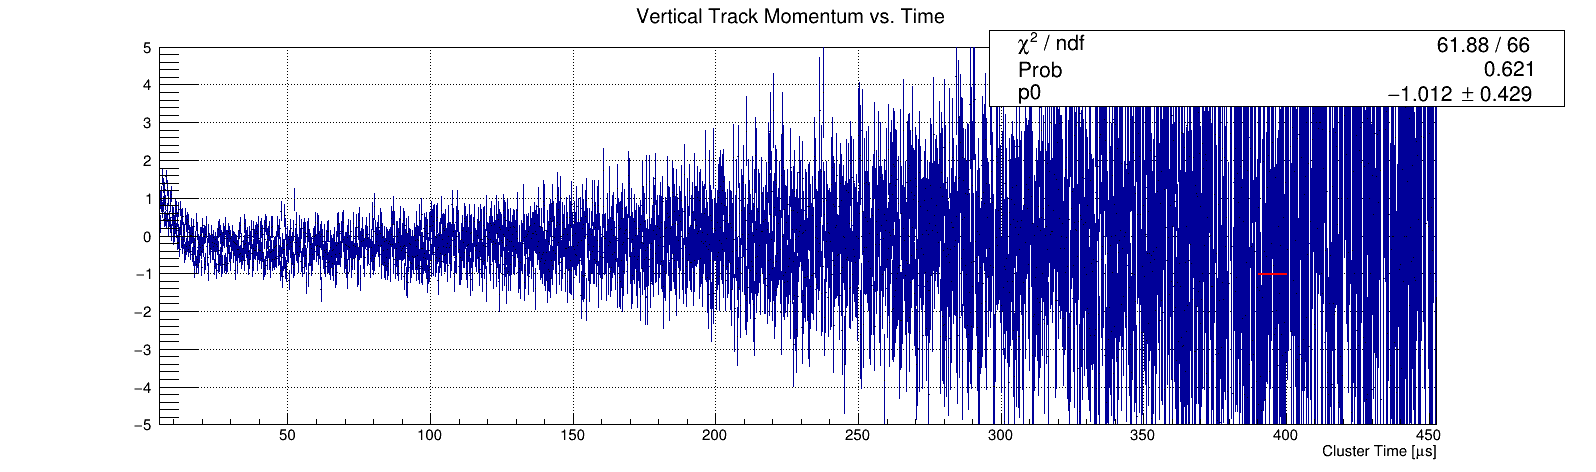

In [30]:
c  = r.TCanvas("c","c",1600,500)
h_py = f.Get("verticalMomentumVsTime").Clone()

h_py.Rebin2D(1,1)

slopes = []
times = []
slope_errs = []

h_py_profilex = h_py.ProfileX().Clone()
h_py_profilex.GetYaxis().SetRangeUser(-5,5)
h_py_profilex.Draw()
for i in range(0,400,10):
    times.append(i)
    func = r.TF1("func","pol0",i,i+10)
    h_py_profilex.Fit(func, "REMBQ")
    slopes.append(func.GetParameter(0))
    slope_errs.append(func.GetParError(0))
c.SetGrid()
c.Draw()

ERROR: Confidence interval length does not match data length


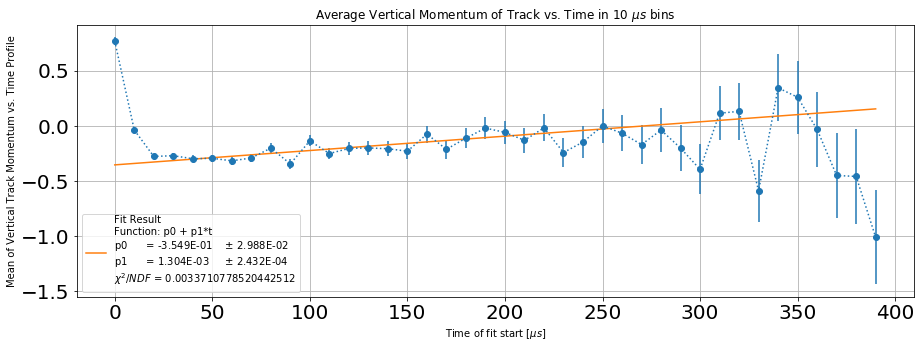

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
plt.errorbar(times,slopes,
             yerr=slope_errs,
             fmt="o:")
plt.xlabel(r"Time of fit start [$\mu s$]")
plt.ylabel("Mean of Vertical Track Momentum vs. Time Profile")
plt.title(r"Average Vertical Momentum of Track vs. Time in 10 $\mu s$ bins")

func = r.TF1("func","pol1",20,200,2)
func.SetParameters(1,1)
fitresult = fitVector( times, slopes, func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi[quantity]))], 
                        #yerr=[0 for i in range(len(dfi['calo_y']))],
                        #yerr=slope_errs 
                     )

ax.plot(times, fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2], "p0 + p1*t") )
drawConfidenceIntervals(ax, times, fitresult, 'red', '95% Confidence Interval')

plt.legend()
plt.grid()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


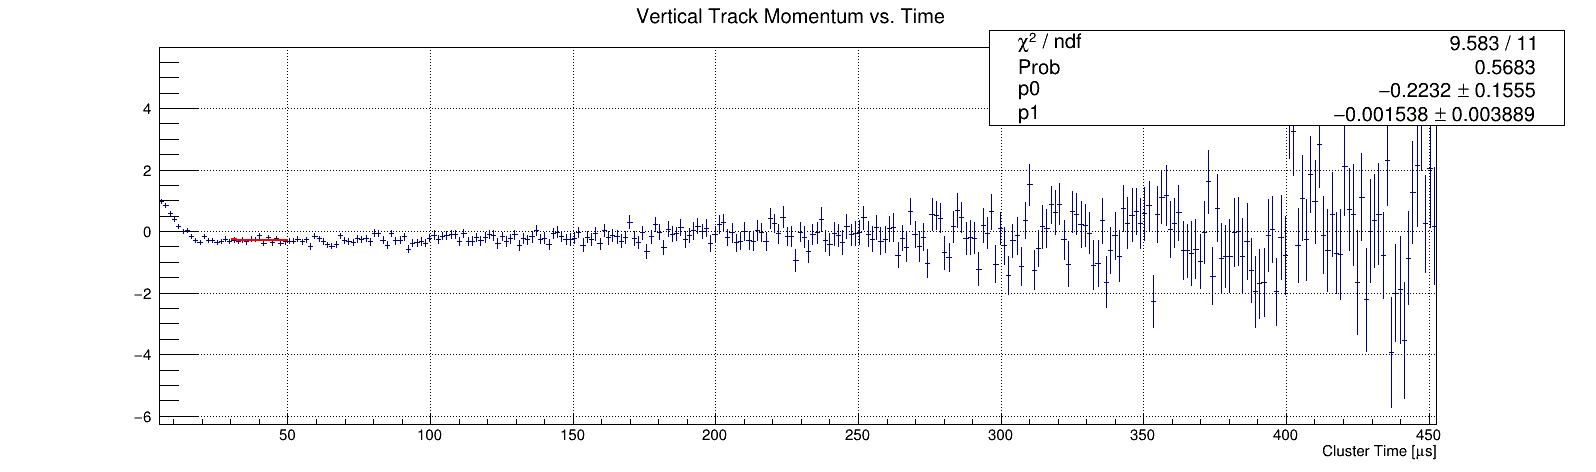

In [32]:
c  = r.TCanvas("c","c",1600,500)
h_py = f.Get("verticalMomentumVsTime").Clone()

h_py.Rebin2D(10,1)

h_py_profilex = h_py.ProfileX().Clone()
#h_py_profilex.GetXaxis().SetRangeUser(30,300)
func = r.TF1("func","pol1",30,50,6)
func.SetParameters(1.8, .0659, 0.0001, -.17, 11.022)
if(True):
    for i in range(2):
        h_py_profilex.Fit(func, "REMBQ")
h_py_profilex.Draw()
func.Draw("SAME")
c.SetGrid()
c.Draw()